# Analysis of COVID-19 Vaccination Trends in the UK

## Introduction 

UK vaccination dataset explores COVID-19 vaccination trends and doses administered, emphasizing the role of vaccination campaigns in combating the disease. 

The report analyzes data to uncover patterns, insights and implications. Insights from this analysis can enhance vaccination programs, optimize resource allocation and ensure widespread vaccine access, providing guidance for policymakers, health officials and practitioners in optimizing vaccination strategies.

In [170]:
# Load neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [171]:
# Load the data
df = pd.read_excel('UK_VaccinationsData.xlsx', sheet_name='data')

In [172]:
# Check the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areaName    904 non-null    object 
 1   areaCode    904 non-null    object 
 2   year        903 non-null    float64
 3   month       904 non-null    int64  
 4   Quarter     903 non-null    object 
 5   day         903 non-null    object 
 6   WorkingDay  902 non-null    object 
 7   FirstDose   900 non-null    float64
 8   SecondDose  901 non-null    float64
 9   ThirdDose   898 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 70.8+ KB


There are 904 entries in the dataset and 10 columns of the type object, float and integer. 

In [173]:
# View the first five rows of the dataframe
df.head()

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0


Columns in the dataset encompass yearly, monthly and daily counts of first, second and third vaccine doses across regions in UK.

### 1: Descriptive statistics

In [174]:
# Display descriptive statistics
statistics = df.describe()
print(statistics)

              year       month      FirstDose    SecondDose      ThirdDose
count   903.000000  904.000000     900.000000    901.000000     898.000000
mean   2021.625692    5.946903    4994.323333   5574.125416   42529.570156
std       0.484212    4.146467    9651.335670   9174.101390  104877.579915
min    2021.000000    1.000000       0.000000      0.000000       0.000000
25%    2021.000000    2.000000     338.500000    478.000000    1313.500000
50%    2022.000000    4.000000     876.500000    971.000000    6992.000000
75%    2022.000000   11.000000    3653.250000   5770.000000   23464.750000
max    2022.000000   12.000000  115551.000000  48491.000000  830403.000000


Dataset covers England, Northern Ireland, Scotland and Wales and spans from 2021 - 2022 from January to December excluding data for June, July and August for both years (presumably, vaccines weren't administered during those months). 

There's an increasing trend in the administration of doses from first to the third dose. First dose averages 4,994, followed by 5,574 second doses and 42,529 third doses, a significant rise indicating impact of booster/follow-up campaigns. 

There's high variability in all doses indicated by standard deviation of 9,651, 9,174 and 10,4877. Additionally, median is significantly lower than the mean at 876, 971 and 6,992 showing instances of significantly higher doses administered. 

Minimum and maximum values range quite significantly from zero to more than hundred thousand indicating that there are several outliers present in the data. 

### 2: Missing values and handling data

In [175]:
# Check for missing values and sum their total
missing_values = df.isnull().sum()
print("\nMissing Values")
print(missing_values)


Missing Values
areaName      0
areaCode      0
year          1
month         0
Quarter       1
day           1
WorkingDay    2
FirstDose     4
SecondDose    3
ThirdDose     6
dtype: int64


Data indicates missing values in seven columns.  

In [176]:
# Handling missing values

# Interpolate missing numerical values for Year, First, Second and Third Dose columns
df.interpolate(method='linear', inplace=True)

# Forward fill missing categorical values for Quarter, Day and Working Day columns
df.fillna(method='ffill', inplace=True) 

In [177]:
# Check again for missing values after handling the data
missing_values_after_handling_data = df.isnull().sum()
print("\nMissing values after handling the data")
print(missing_values_after_handling_data)


Missing values after handling the data
areaName      0
areaCode      0
year          0
month         0
Quarter       0
day           0
WorkingDay    0
FirstDose     0
SecondDose    0
ThirdDose     0
dtype: int64


No missing values are present after handling the data. Interpolation technique is used to address missing numerical values and forward filling to handle categorical values. 

In [178]:
# Remove outliers by computing Z-scores for First, Second and Third Dose columns

# Select the columns
selected_columns = ['FirstDose', 'SecondDose', 'ThirdDose']

# Calculate Z-scores for the selected columns
df_z_scores = df[selected_columns].apply(stats.zscore)

# Define a threshold for Z-score
threshold = 4 

# Filter outliers based on Z-score
outliers = (np.abs(df_z_scores) > threshold).any(axis=1)
df_filtered = df[~outliers]

# Display descriptive statistics for the filtered DataFrame
statistics_filtered = df_filtered.describe()
print(statistics_filtered)

              year       month     FirstDose    SecondDose      ThirdDose
count   889.000000  889.000000    889.000000    889.000000     889.000000
mean   2021.636670    5.851519   4395.687852   5047.263217   33405.024747
std       0.481229    4.114137   8151.218418   8257.898612   74459.366213
min    2021.000000    1.000000      0.000000      0.000000       0.000000
25%    2021.000000    2.000000    328.000000    473.000000    1293.000000
50%    2022.000000    4.000000    851.000000    940.000000    6875.000000
75%    2022.000000   11.000000   3323.000000   4514.000000   21337.000000
max    2022.000000   12.000000  42413.000000  41351.000000  419657.000000


Data has been refined by excluding outliers using Z-scores to check data deviations from the mean. Z-scores exceeding threshold of 4 are considered outliers.

After removing the outliers, it can be seen that both mean and median seem to have moved a bit closer, indicating reduction in skewness. Standard deviation has also decreased, resulting in less data variability. Maximum values have also reduced quite considerably.

### 3: Graphs visualizing information

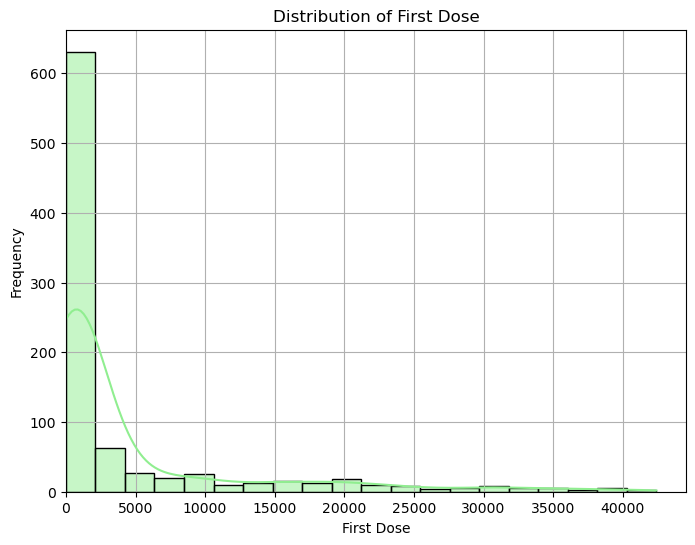

In [179]:
# 3(A)(I) Distribution of a continuous variable: First Dose

# Set figure size
plt.figure(figsize=(8, 6))

# Plot the histogram
sns.histplot(df_filtered['FirstDose'], bins=20, 
             color='lightgreen', 
             kde=True) # kde for smooth representation of distribution

# Set axis limits and add grid lines
plt.grid(True)
plt.xlim(0)
plt.ylim(0)

# Label the axes and add the title
plt.xlabel('First Dose')
plt.ylabel('Frequency')
plt.title('Distribution of First Dose')

# Show the plot
plt.show()

The histogram illustrates the distribution of first vaccine dose administered.

Vaccine numbers range from 0 - 45,000 and there seems to be a decreasing trend. Across more than 600 days, few vaccines were administered, less than 3,000 doses. Whereas, on 5 to 30 days, a substantial increase in vaccine count is visible with numbers ranging between 10,000 - 45,000. 

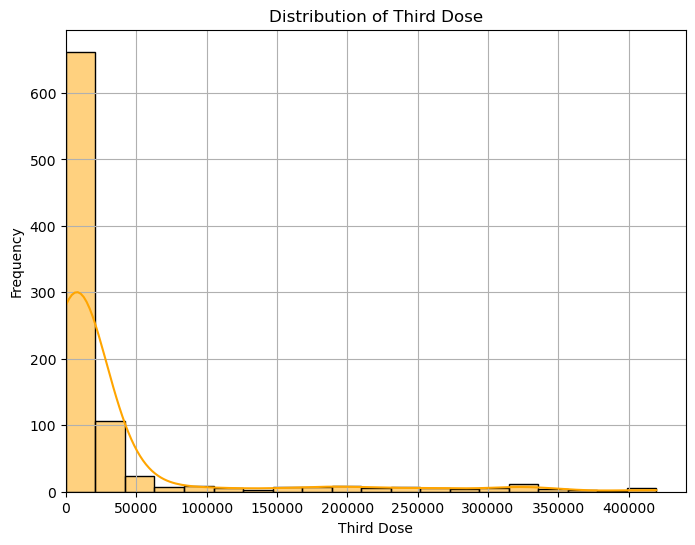

In [180]:
# 3(A)(II) Distribution of a continuous variable: Third Dose

# Set figure size
plt.figure(figsize=(8, 6))

# Plot the histogram
sns.histplot(df_filtered['ThirdDose'], bins=20, color='orange', kde=True) 

# Set axis limits and add grid lines
plt.grid(True)
plt.xlim(0)
plt.ylim(0)

# Label the axes and add the title
plt.xlabel('Third Dose')
plt.ylabel('Frequency')
plt.title('Distribution of Third Dose')

# Show the plot
plt.show()

The histogram illustrates the distribution of third vaccine dose administered.

Number of vaccines range from 0 - 400,000+ and there seems to be a decreasing trend. On more than 650 days, less than 15,000 vaccines were administered, somewhat high compared to first doses. Whereas, on 10 to 20 days, a substantial increase in vaccine count is visible with numbers ranging between 100,000 - 400,000+ primarily due to targeted booster campaigns, vaccine surges or backlog clearing. 

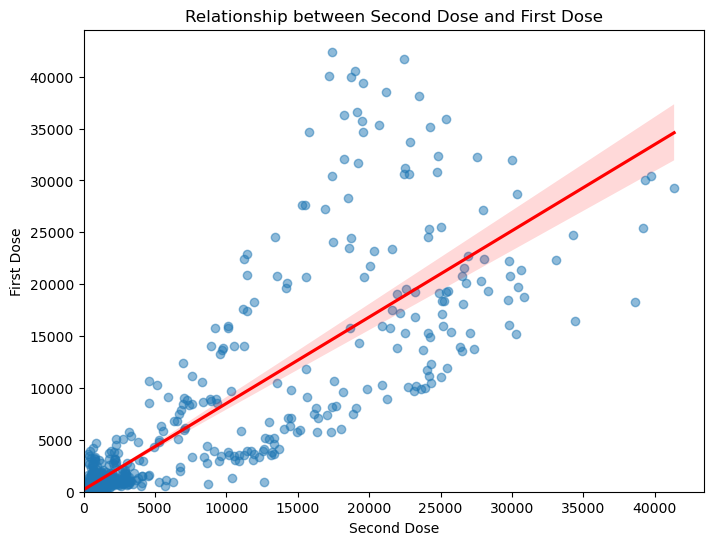

In [181]:
# 3(B) Relationship of a pair of continuous variables: Second Dose vs First Dose 

# Set figure size
plt.figure(figsize=(8, 6))

# Plot the scatterplot and add the regression line 
sns.regplot(data=df_filtered, x='SecondDose', y='FirstDose', 
            scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

# Set axis limits
plt.xlim(0)
plt.ylim(0)

# Label the axes and add the title
plt.xlabel('Second Dose')
plt.ylabel('First Dose')
plt.title('Relationship between Second Dose and First Dose')

# Show the plot
plt.show()

The scatter plot shows a postive correlation between second and first doses. Majority values are near zero suggesting days with lower counts of both doses. Range for first and second doses spans between 0 - 40,000. 

Average first and second doses closely align indicating a balanced distribution. A peak is observed when between 20,000 - 30,000 second doses align with 35,000 - 40,000 first doses. 

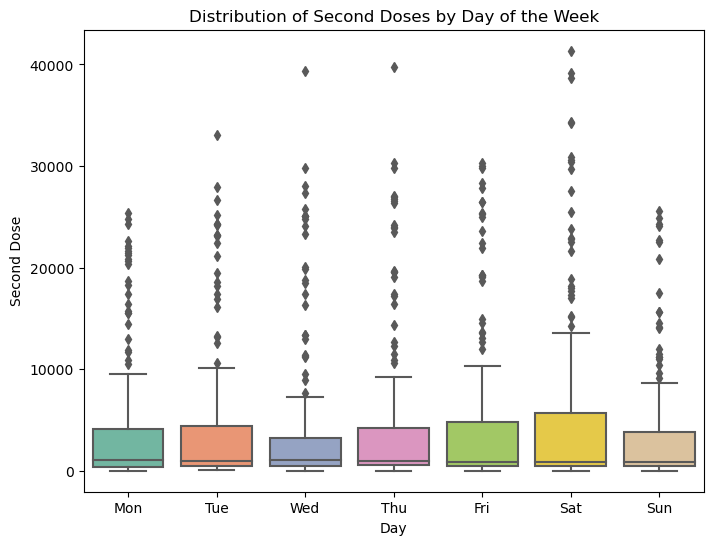

In [182]:
# 3(C) Association between categorical variable (Day) and continuous (Second Dose)

# Set figure size
plt.figure(figsize=(8, 6))

# Add list of days in the desired order
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot the boxplot
sns.boxplot(data=df_filtered, x='day', y='SecondDose', 
            palette='Set2', order=days_order)

# Label the axes and add the title
plt.xlabel('Day')
plt.ylabel('Second Dose')
plt.title('Distribution of Second Doses by Day of the Week')

# Show the plot
plt.show()

The boxplot illustrates the distribution of second dose across days of the week. 

There's a consistent increase in the number of doses administered throughout the days. Median value for all days is low, nearing zero. Interquartile range of Saturday is the widest spanning from 0 - 5,000 indicating variability in number of doses. Monday, Tuesday, Thursday and Friday display a range between 0 - 3,000, followed by Wednesday and Sunday on which the range is the lowest from 0 - 2,000. 

Numerous outliers are observed on all days, particularly reaching 40,000 doses on Wednesday, Thursday and Saturday indicating inconsistent dosage administration.

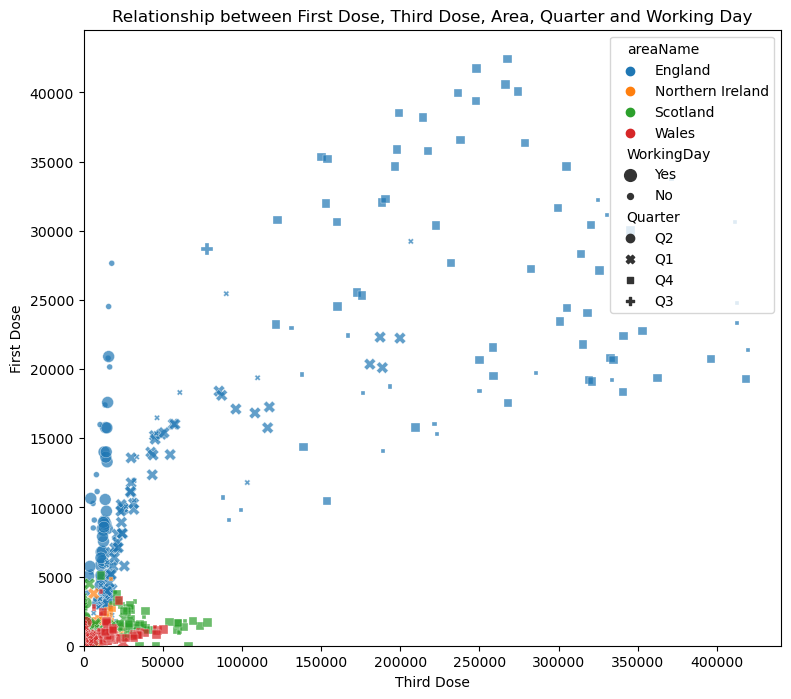

In [183]:
# 3(D) Relationship between more than two variables - 
# First Dose, Third Dose, Area, Quarter and Working Day

# Set figure size
plt.figure(figsize=(9, 8))

# Plot the scatterplot
sns.scatterplot(data=df_filtered, x='ThirdDose', y='FirstDose', hue='areaName', 
                style='Quarter', size='WorkingDay', alpha=0.7)

# Set axis limits
plt.xlim(0)
plt.ylim(0)

# Label the axes and add the title
plt.xlabel('Third Dose')
plt.ylabel('First Dose')
plt.title('Relationship between First Dose, Third Dose, Area, Quarter and Working Day')

# Show the plot
plt.show()

The scatter plot visualizes the relationship between first and third dose vaccination counts across areas, quarters and working days. 

There's a postive relationship between the number of first and third doses with majority instances recorded below 2,000. England stands out with the highest count during the fourth quarter reaching a peak of over 400,000 third and over 45,000 first doses attributing to its large population and healthcare infrastructure. 

Majority of high doses were administered on a working day indicating strategically organized vaccination drives to ensure accessibility and participation.  

Few doses were recorded in Northern Ireland, Scotland and Wales, mostly below 5,000 primarily distributed on a working day in first and fourth quarters. 

### 4: Unique values and frequencies

In [184]:
# Print unique values present in the Area Name column
unique_values = df_filtered['areaName'].unique()
print(unique_values)

['England' 'Northern Ireland' 'Scotland' 'Wales']


In [185]:
# Print frequencies of these values 
frequency = df_filtered['areaName'].value_counts()
print("\nUnique values and their frequencies")
print(frequency)


Unique values and their frequencies
Northern Ireland    236
Scotland            222
England             221
Wales               210
Name: areaName, dtype: int64


Area column contains four values, England (221), Northern Ireland (236), Scotland (222) and Wales (210).

### 5: Contingency table and statistical test

In [186]:
# Contingency table of two related categorical variables - Area and Day
contingency_table = pd.crosstab(df_filtered['day'], df_filtered['areaName'])
print(contingency_table)

areaName  England  Northern Ireland  Scotland  Wales
day                                                 
Fri            33                33        32     30
Mon            33                34        31     30
Sat            32                35        32     30
Sun            33                34        32     30
Thu            31                34        32     30
Tue            30                33        31     30
Wed            29                33        32     30


The table highlights consistent and equal distribution of first, second and third doses across days of the week within four regions. 

In [187]:
# Perform a statistical test of independence - Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}, p-value: {p}")

Chi-square value: 0.4265559453313502, p-value: 0.9999999999979229


The statistical test used to check independence of categorical variables, day and area is chi-square test. Result shows a chi-square value of 0.426 and a p-value of 0.999 suggesting no significant relationship between area and day i.e day of the week is not related to vaccination distribution across different areas.

The null hypothesis proposes independence between variables, and the p-value (> 0.05) suggests lack of evidence to reject it.

### 6: Descriptive statistics of subset

In [188]:
# Descriptive statistics on subsets - Quarter 4 and Year 2021
subset = df_filtered[(df_filtered['Quarter'] == 'Q4') 
                     & (df_filtered['year'] == 2021)]
print(subset.describe())

         year       month     FirstDose    SecondDose      ThirdDose
count   321.0  321.000000    321.000000    321.000000     321.000000
mean   2021.0   11.071651   6915.613707   6088.934579   74948.372274
std       0.0    0.793237  11276.639537   9250.445497  108261.479796
min    2021.0   10.000000      0.000000      0.000000       0.000000
25%    2021.0   10.000000    703.000000    812.000000   12984.000000
50%    2021.0   11.000000   1208.000000   1316.000000   24424.000000
75%    2021.0   12.000000   3266.000000   3206.000000   63327.000000
max    2021.0   12.000000  42413.000000  39755.000000  419657.000000


The subset of data zooms into the fourth quarter of 2021. On average, 6,915 first doses, 6,088 second doses and a substantial 74,948 third doses were administered. 

Standard deviation of all doses is quite high, especially the third dose with a deviation of 108,261 indicating a wide range of variability. Maximum and minimum values show variation for all doses, specifically ranging from 0 - 419,657 for the third dose. 

First and second doses have similar medians, while the third dose exhibits a higher median of 24,424, indicating half observations fall below this threshold.

### 7: Statistical test between means

In [189]:
# Statistical test of difference between means of First Dose in Wales and Northern Ireland 
subset1 = df_filtered[df_filtered['areaName'] == 'Northern Ireland']
subset2 = df_filtered[df_filtered['areaName'] == 'Wales']

t_stat, p_value = stats.ttest_ind(subset1['FirstDose'], subset2['FirstDose'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# Calculate the mean of First Dose for Northern Ireland
mean_northern_ireland = subset1['FirstDose'].mean()
print(f"Mean of First Dose in Northern Ireland: {mean_northern_ireland}")

# Calculate the mean of First Dose for Wales
mean_wales = subset2['FirstDose'].mean()
print(f"Mean of First Dose in Wales: {mean_wales}")

T-statistic: -2.898291763033135, p-value: 0.0039378127970967555
Mean of First Dose in Northern Ireland: 496.45338983050846
Mean of First Dose in Wales: 663.0428571428571


A t-test is conducted to test significance of difference between means of first doses in Wales and Northern Ireland. 

Result indicates t-statistic of -2.89 and p-value of 0.003 suggesting significant difference between means of first doses administered in Northern Ireland and Wales and signifies strong evidence to reject the null hypothesis. 

Therefore, the mean first doses administered in Northern Ireland (496) and Wales (663) are significantly different.

### 8: Group data and summarize

In [190]:
# 8(A) Group data by a categorical variable - Quarter wise sum of doses
grouped_data = df_filtered.groupby('Quarter').agg({'FirstDose': 'sum', 
                                                   'SecondDose': 'sum', 
                                                   'ThirdDose': 'sum'})
print("\nQuarterly summation of doses")
print(grouped_data)


Quarterly summation of doses
         FirstDose  SecondDose   ThirdDose
Quarter                                   
Q1       1024024.0   2013622.0   4732824.0
Q2        634364.5    487665.0    827052.0
Q3         29466.0     31182.0     78763.5
Q4       2219912.0   1954548.0  24058427.5


The data presents a quarterly summation of all doses. The highest number of doses were administered in first and fourth quarter. Specifically, peak count for third doses was recorded in fourth quarter, totaling 24,058,427 indicating substantial vaccination effort during this period.

Conversely, lowest number of all doses were administered in third quarter with 29,466 first doses being the lowest. 

In [191]:
# 8(B) Group data by a categorical variable - Area wise mean of doses
grouped_data = df_filtered.groupby('areaName').agg({'FirstDose': 'mean', 
                                                    'SecondDose': 'mean', 
                                                    'ThirdDose': 'mean'})
print("\nAverage doses administered across different regions")
print(grouped_data)


Average doses administered across different regions
                     FirstDose    SecondDose      ThirdDose
areaName                                                   
England           15346.122172  17286.049774  106423.875566
Northern Ireland    496.453390    574.750000    4787.114407
Scotland           1170.592342   1569.130631   14780.524775
Wales               663.042857    870.533333    8411.214286


The data presents average number of all doses administered in each region. Average is the highest for England with a peak count for third doses recorded at 106,423. Conversely, Northern Ireland exhibits the lowest average at 496 first doses, suggesting varying vaccination trends across regions. 

### 9: Linear regression model 

In [192]:
# Linear regression model - Dependent: Third Dose, Independent: First and Second Dose 
model = sm.OLS.from_formula(
    'ThirdDose ~ FirstDose + SecondDose', data=df_filtered).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ThirdDose   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     912.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.95e-216
Time:                        22:49:35   Log-Likelihood:                -10737.
No. Observations:                 889   AIC:                         2.148e+04
Df Residuals:                     886   BIC:                         2.149e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -851.9091   1676.830     -0.508      0.612   -4142.931    2439.112
FirstDose      6.5327      0.326     20.025      0.000       5.892       7.173
SecondDose     1.0979      0.322      3.409      0.001       0.466       1.730
==============================================================================
Omnibus:                      368.627   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3921.077
Skew:                           1.586   Prob(JB):                         0.00
Kurtosis:                      12.788   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The linear regression model uses third dose as dependent variable and first and second doses as independent variables.

Regression results provide valuable insights and produce the following model: ThirdDose = -851.9091 + 6.5327 × FirstDose + 1.0979 × SecondDose. Coefficients estimate third dose based on the first and second doses indicating that third dose is positively affected by first and second dose, potentially driven by health campaigns emphasizing significance of taking initial doses and motivating the public to take the third dose.

Low p-values (0.000 and 0.001 < 0.05) indicate variables are significant in predicting the third dose.

Adjusted R square is 0.672 indicating 67.2% of the third dose variance can be explained by first and second dose. 

Althought, outliers have been removed, the Jarque-Bera test value of 3,921 indicates some skewness in the data.

The model is statistically significant, explaining a considerable portion of variance.

### Assumptions of normality and zero mean of residuals

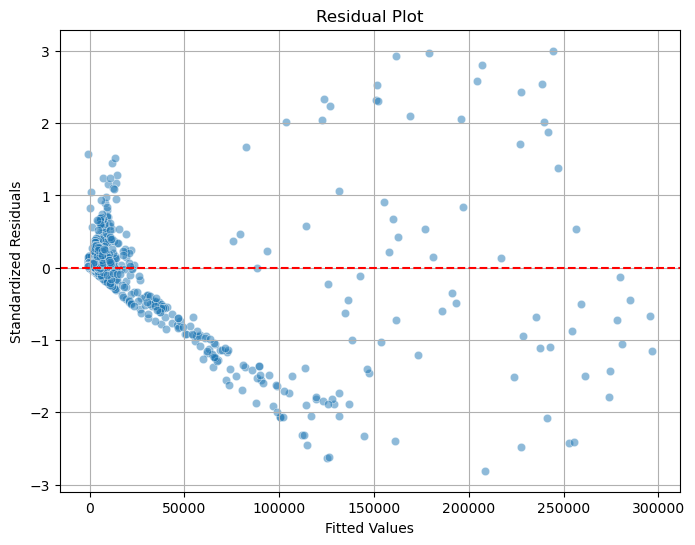

In [193]:
# Create a scatter plot of standardized residuals against fitted values

# Filter residuals based on the dataset
st_resids = model.get_influence().resid_studentized_internal
fitted_values = model.fittedvalues

# Set figure size
plt.figure(figsize=(8, 6))

# Plot the scatterplot
sns.scatterplot(x=filtered_fitted_values, y=filtered_resids, alpha=0.5)

# Label the axes and add the title and grid
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--') # Add horizontal line at y=0
plt.grid(True)

# Show the plot
plt.show()

Scatter plot shows majority of the residuals are scattered within a range of -3 - 3 indicating the model makes reasonably accurate predictions for majority of observations.

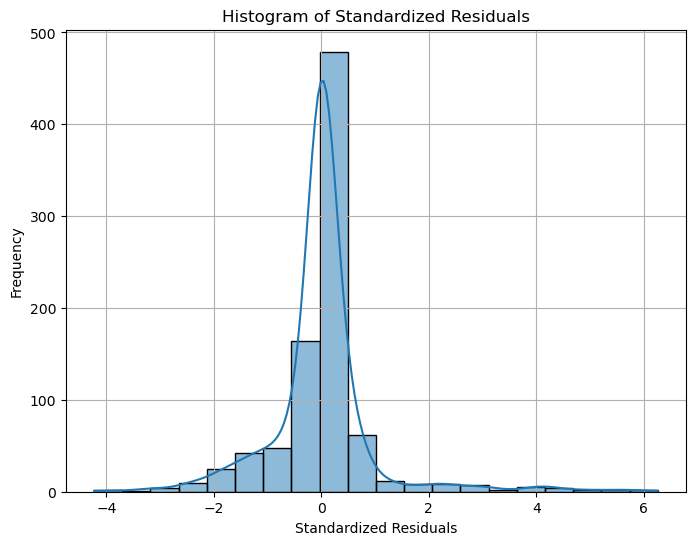

In [194]:
# Create a histogram to check the normality of the standardized residuals

# Filter residuals based on the dataset
st_resids = model.get_influence().resid_studentized_internal

# Increase figure size
plt.figure(figsize=(8, 6))

# Plot the histogram
sns.histplot(st_resids, bins=20, kde=True) 

# Label the axes and add a title
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals')
plt.grid(True)

# Show the plot
plt.show()

Histogram shows majority values are around zero implying residuals have a mean close to zero and are normally distributed, suggesting the model makes accurate predictions. 

Therefore, we can conclude not to reject the null hypothesis. 

## Conclusion

Analysis of the UK vaccination data reveals the following key findings:
* Disparities exist in dose administration across regions with England recording the highest average (139,056) and Northern Ireland (5,858) the lowest. Discrepancy is likely due to England's larger population, differences in healthcare infrastructure, accessibility to vaccination centers and logistical capabilities across regions.
* Doses were distributed relatively evenly across all days, however, majority were administered on working days indicating strategically organized vaccination drives to ensure accessibility and participation.
* First and second doses have significant effects on predicting third dose vaccinations likely influenced by campaigns emphasizing completing initial doses and uptaking the third dose.
* Few doses were administered in the third quarter (139,412) compared to highest count in the fourth quarter (28,232,888), primarily due to fluctuations in vaccine supply or shifts in campaigns and health policies.
* Dataset displays large variations, indicated by high standard deviations and wide range between minimum and maximum values (0 - 400,000+). 
* Highest average was recorded for the third dose (33,405), followed by second (5,047) and first (4,395) indicating potential booster or follow-up vaccination campaigns. 
* Outliers in data have resulted in skewness, impacting dataset's distribution and analysis.

These findings offer insights for policymakers, public health officials and healthcare practitioners. Recommendations include strategies to optimize vaccine distribution, prioritize interventions in underserved areas such as Northern Ireland to enhance vaccination rates and monitor drives to ensure sustained effectiveness.